# CEO Age Distribution Analysis

## Motivation

I was reading an article (https://nyti.ms/3TVa2Tl) about how founders of successful tech comapnies are "mostly middle-aged". This got me thinking about what the **age distribution** of CEO's in general look like; so I decided to do some web scraping and data analysis :)

In [45]:
from datetime import datetime

# Fetching remote data
import urllib
import urllib.request

import pandas as pd
import numpy as np
import sqlite3

# Approximate string matching
import py_stringsimjoin as ssj
import py_stringmatching as sm

# Data visualization
import matplotlib


In [2]:
# Import this convenient list of companies
data = urllib.request.urlopen('https://gist.github.com/jvilledieu/c3afe5bc21da28880a30/raw/a344034b82a11433ba6f149afa47e57567d4a18f/Companies.csv')

company_data_df = pd.read_csv(data)
    

In [3]:
# Practicing SQL -> writing df to local.db
conn = sqlite3.connect('local.db')

company_data_df.to_sql("companies", conn, if_exists="replace", index=False)

pd.read_sql_query('select * from companies', conn)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1 750 000,acquired,USA,NY,New York City,New York,1,01/06/2012,2012-06,2012-Q2,2012.0,30/06/2012,30/06/2012
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4 000 000,operating,USA,CA,Los Angeles,Los Angeles,2,None,None,None,NaN,04/06/2010,23/09/2010
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40 000,operating,EST,None,Tallinn,Tallinn,1,26/10/2012,2012-10,2012-Q4,2012.0,09/08/2012,09/08/2012
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|iPhone|Apps|Mobile|iOS|E-Commerce|,Electronics,1 500 000,operating,GBR,None,London,London,1,01/04/2011,2011-04,2011-Q2,2011.0,01/04/2011,01/04/2011
4,/organization/n-plusn,+n (PlusN),http://plusn.com,|Software|,Software,1 200 000,operating,USA,NY,New York City,New York,2,01/01/2012,2012-01,2012-Q1,2012.0,29/08/2012,04/09/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47753,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|Android|Education|,Education,320 000,operating,GBR,None,London,London,1,28/01/2013,2013-01,2013-Q1,2013.0,24/03/2014,24/03/2014
47754,/organization/zznode-science-and-technology-co-ltd,ZZNode Science and Technology,http://www.zznode.com,|Enterprise Software|,Enterprise Software,1 587 301,operating,CHN,None,Beijing,Beijing,1,None,None,None,NaN,01/04/2012,01/04/2012
47755,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,|Web Development|Advertising|Wireless|Mobile|,Web Development,97 398,operating,HRV,None,Split,Split,5,13/05/2012,2012-05,2012-Q2,2012.0,01/11/2011,10/09/2014
47756,/organization/a-list-games,[a]list games,http://www.alistgames.com,|Games|,Games,9 300 000,operating,None,None,None,None,1,None,None,None,NaN,21/11/2011,21/11/2011


In [4]:
# Import CEO data from Wikipedia 

company_ceos_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_chief_executive_officers#List_of_CEOs')[0]

company_ceos_df

,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,CEO[1],2019,"Succeeded Pierre Nanterme, died",2019-01-31
1,Aditya Birla Group,Kumar Mangalam Birla,Chairman[2],1995[2],Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO[3]",2007,Formerly with Apple,2018-10-01
3,Agenus,Garo H. Armen,"Founder, chairman, CEO[4]",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
4,Airbus,Guillaume Faury,CEO[5],2012,Succeeded Louis Gallois,2017-11-14
...,...,...,...,...,...,...
178,Wipro,Thierry Delaporte,CEO[161],2016,Previously with Tata Consultancy Services,2017-11-11
179,WWE,Stephanie McMahon,Chairwoman and Co-CEO (Alongside Nick Khan) [162],2022,Chairwoman of the executive committeeChairwoman since 2022 CEO since July 22 2022,2017-11-11
180,Yum! Brands,Greg Creed,CEO[163],2015,Previously CEO for Taco Bell,2017-11-11
181,Zillow Group,Rich Barton,CEO[164],2019,Co-founder and previously was Zillow's CEO for nearly a decade. Succeeded Spencer Rascoff.,2018-12-10


In [5]:
# Cleaning up company_ceos_df to remove citations in square brackets from Titel and Since
company_ceos_df["Title"] = company_ceos_df["Title"].apply(lambda x : x.split('[')[0])

In [6]:
company_ceos_df["Since"] = company_ceos_df["Since"].apply(lambda x : x.split('[')[0])

In [7]:
company_ceos_df

,Company,Executive,Title,Since,Notes,Updated
0,Accenture,Julie Sweet,CEO,2019,"Succeeded Pierre Nanterme, died",2019-01-31
1,Aditya Birla Group,Kumar Mangalam Birla,Chairman,1995,Part of the Birla family business house in India,2018-10-01
2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO",2007,Formerly with Apple,2018-10-01
3,Agenus,Garo H. Armen,"Founder, chairman, CEO",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01
4,Airbus,Guillaume Faury,CEO,2012,Succeeded Louis Gallois,2017-11-14
...,...,...,...,...,...,...
178,Wipro,Thierry Delaporte,CEO,2016,Previously with Tata Consultancy Services,2017-11-11
179,WWE,Stephanie McMahon,Chairwoman and Co-CEO (Alongside Nick Khan),2022,Chairwoman of the executive committeeChairwoman since 2022 CEO since July 22 2022,2017-11-11
180,Yum! Brands,Greg Creed,CEO,2015,Previously CEO for Taco Bell,2017-11-11
181,Zillow Group,Rich Barton,CEO,2019,Co-founder and previously was Zillow's CEO for nearly a decade. Succeeded Spencer Rascoff.,2018-12-10


In [8]:
# Constrcut list of CEO Wiki page URL's
crawl_list = []

for executive in company_ceos_df['Executive']:
    crawl_list.append('https://en.wikipedia.org/wiki/' + executive.replace(' ', '_'))

crawl_list

['https://en.wikipedia.org/wiki/Julie_Sweet',
 'https://en.wikipedia.org/wiki/Kumar_Mangalam_Birla',
 'https://en.wikipedia.org/wiki/Shantanu_Narayen',
 'https://en.wikipedia.org/wiki/Garo_H._Armen',
 'https://en.wikipedia.org/wiki/Guillaume_Faury',
 'https://en.wikipedia.org/wiki/Daniel_Zhang',
 'https://en.wikipedia.org/wiki/Andy_Jassy',
 'https://en.wikipedia.org/wiki/Lisa_Su',
 'https://en.wikipedia.org/wiki/Stephen_Squeri',
 'https://en.wikipedia.org/wiki/Robert_Isom',
 'https://en.wikipedia.org/wiki/Joseph_R._Swedish',
 'https://en.wikipedia.org/wiki/Tim_Cook',
 'https://en.wikipedia.org/wiki/Lakshmi_Niwas_Mittal',
 'https://en.wikipedia.org/wiki/John_Stankey',
 'https://en.wikipedia.org/wiki/Charles_Woodburn',
 'https://en.wikipedia.org/wiki/Tapan_Singhel',
 'https://en.wikipedia.org/wiki/Carlos_Torres_Vila',
 'https://en.wikipedia.org/wiki/Brian_Moynihan',
 'https://en.wikipedia.org/wiki/Jes_Staley',
 'https://en.wikipedia.org/wiki/Warren_Buffett',
 'https://en.wikipedia.org/wi

In [9]:
# Visit each web page and store the responses 
pages = []

for url in crawl_list:
    page = url.split("/")[-1] # Get CEO name
    print(f'Looking at file {page}')

    # Convert accent characters into HTML URL to avoid errors

    url_list = list(urllib.parse.urlsplit(url))
    url_list[2] = urllib.parse.quote(url_list[2])
    url_ascii = urllib.parse.urlunsplit(url_list)
    try:
        response = urllib.request.urlopen((url_ascii))
      #Save page and url for later use.
        pages.append(response)
    except urllib.error.URLError as e:
        print(e.reason)

Looking at file Julie_Sweet
Looking at file Kumar_Mangalam_Birla
Looking at file Shantanu_Narayen
Looking at file Garo_H._Armen
Looking at file Guillaume_Faury
Looking at file Daniel_Zhang
Looking at file Andy_Jassy
Looking at file Lisa_Su
Looking at file Stephen_Squeri
Looking at file Robert_Isom
Not Found
Looking at file Joseph_R._Swedish
Looking at file Tim_Cook
Looking at file Lakshmi_Niwas_Mittal
Looking at file John_Stankey
Looking at file Charles_Woodburn
Looking at file Tapan_Singhel
Looking at file Carlos_Torres_Vila
Looking at file Brian_Moynihan
Looking at file Jes_Staley
Looking at file Warren_Buffett
Looking at file Hubert_Joly
Looking at file Sunil_Bharti_Mittal
Looking at file Stephen_A._Schwarzman
Looking at file Andrew_Mackenzie
Looking at file Oliver_Zipse
Looking at file Dave_Calhoun
Looking at file Rich_Lesser
Looking at file Bob_Dudley
Looking at file Denise_Morrison
Looking at file Mark_Shuttleworth
Looking at file Aiman_Ezzat
Not Found
Looking at file Richard_Fai

In [10]:
pages

In [11]:
# First use lxml on HTML content of each page to get DOM tree which can be processed with XPath to extract bday info. Store CEO name, webpage, and bday in exec_df.
# Check if HTML content has table with type 'vcard' -> then extract 'bday' info; otherwise bday is NaT

from lxml import etree

exec_df = pd.DataFrame(columns=['name','page','born'])

for page in pages:    
    tree = etree.HTML(page.read().decode("utf-8"))  # Create a DOM tree of page
    url = page.geturl()
    bday = tree.xpath('//table[contains(@class,"vcard")]//span[@class="bday"]/text()')
    if len(bday) > 0:
        name = url[url.rfind('/')+1:] # The part of the URL after the last /
        exec_df.loc[len(exec_df.index)] = [name, url, datetime.datetime.strptime(bday[0], '%Y-%m-%d')]
    else: 
        exec_df.loc[len(exec_df.index)] = [url[url.rfind('/')+1:], url, None]
exec_df

,name,page,born
0,Julie_Sweet,https://en.wikipedia.org/wiki/Julie_Sweet,NaT
1,Kumar_Mangalam_Birla,https://en.wikipedia.org/wiki/Kumar_Mangalam_Birla,1967-06-14 00:00:00
2,Shantanu_Narayen,https://en.wikipedia.org/wiki/Shantanu_Narayen,1963-05-27 00:00:00
3,Garo_H._Armen,https://en.wikipedia.org/wiki/Garo_H._Armen,1953-01-31 00:00:00
4,Guillaume_Faury,https://en.wikipedia.org/wiki/Guillaume_Faury,1968-02-22 00:00:00
...,...,...,...
170,Laura_J._Alber,https://en.wikipedia.org/wiki/Laura_J._Alber,None
171,Stephanie_McMahon,https://en.wikipedia.org/wiki/Stephanie_McMahon,1976-09-24 00:00:00
172,Greg_Creed,https://en.wikipedia.org/wiki/Greg_Creed,None
173,Rich_Barton,https://en.wikipedia.org/wiki/Rich_Barton,None


In [16]:
# Checking for valid birthdays
exec_df.born.dropna().sort_values()

71     1576-02-29 00:00:00
70     1928-03-07 00:00:00
18     1930-08-30 00:00:00
73     1934-12-14 00:00:00
84     1935-11-01 00:00:00
              ...         
171    1976-09-24 00:00:00
129    1980-05-04 00:00:00
52     1984-05-14 00:00:00
154    1984-05-21 00:00:00
120    1992-01-24 00:00:00
Name: born, Length: 104, dtype: object

In [17]:
# Drop the CEO born in 1576
exec_df.drop([71], inplace = True)

In [18]:
exec_df.reset_index(inplace = True)

In [12]:
# Checking out the data

In [19]:
exec_df2 = exec_df.copy()

In [20]:
for person in exec_df['name']:
    print (person)

Julie_Sweet
Kumar_Mangalam_Birla
Shantanu_Narayen
Garo_H._Armen
Guillaume_Faury
Daniel_Zhang
Andy_Jassy
Lisa_Su
Stephen_Squeri
Joseph_R._Swedish
Tim_Cook
Lakshmi_Niwas_Mittal
John_Stankey
Charles_Woodburn
Tapan_Singhel
Carlos_Torres_Vila
Brian_Moynihan
Jes_Staley
Warren_Buffett
Hubert_Joly
Sunil_Bharti_Mittal
Stephen_A._Schwarzman
Andrew_Mackenzie
Oliver_Zipse
Dave_Calhoun
Rich_Lesser
Bob_Dudley
Denise_Morrison
Mark_Shuttleworth
Richard_Fairbank
Jim_Umpleby
Evan_G._Greenberg
Chuck_Robbins
Jane_Fraser
James_Quincey
Brian_Humphries
Brian_L._Roberts
Tidjane_Thiam
Ola_K%C3%A4llenius
Michael_Dell
Ed_Bastian
Christian_Sewing
Frank_Appel
Roland_Dickey_Jr.
Edward_D._Breen
G._V._Prasad
Devin_Wenig
Andrew_Wilson
B%C3%B6rje_Ekholm
Darren_Woods
Lisa_S._Jones
Carmine_Di_Sibio
Mark_Zuckerberg
Frederick_W._Smith
Sergio_Marchionne
Abigail_Johnson
James_Michael_Lafferty
James_Hackett
Terry_Gou
Lachlan_Murdoch
Daymond_John
Phebe_Novakovic
H._Lawrence_Culp_Jr.
Mary_T._Barra
Emma_Walmsley
David_M._Solomon

In [21]:
# Convert underscores to spaces
exec_df["name"] = exec_df.apply(lambda row : row['name'].replace('_', ' '), axis=1)

In [22]:
# Converting underscore to space in SQL

temp_df= exec_df2.applymap(str)
temp_df.to_sql('temp_exec', conn, if_exists="replace")

pd.read_sql_query('select replace(name, "_", " ") as name from temp_exec', conn)


,name
0,Julie Sweet
1,Kumar Mangalam Birla
2,Shantanu Narayen
3,Garo H. Armen
4,Guillaume Faury
...,...
169,Laura J. Alber
170,Stephanie McMahon
171,Greg Creed
172,Rich Barton


In [23]:
# Data validation -> check if all exec names are good

replace_item = ''

failed = False
for name in exec_df['name']:
    if not name.replace(' ', replace_item).\
          replace('.', replace_item).\
          replace('\'',replace_item).\
          replace('-',replace_item).isalpha():
        print ("Illegal name %s"%name)
        failed = True
    
if failed:
    print('Found illegal names!')


Illegal name Ola K%C3%A4llenius
Illegal name B%C3%B6rje Ekholm
Illegal name Michael O%27Leary
Found illegal names!


In [24]:
import validators.url
exec_df['page'].apply(validators.url).unique()
# URL's are all valid

array([ True])

In [30]:
# Joining df's based on executive names which are misspelled / have utf-8 encodings (especially for letters with accents)
tok = sm.QgramTokenizer(qval=5,return_set=True)
company_ceos_df.reset_index(inplace=True)
output_pairs = ssj.jaccard_join(company_ceos_df, exec_df, 'index', 'page', 'Executive', 'name', tok, 0.3, 
                                l_out_attrs=['Executive'], r_out_attrs=['name'])

output_pairs[output_pairs['_sim_score'] < 1.0]

/Users/tompan/opt/anaconda3/envs/webscrape/lib/python3.8/site-packages/py_stringsimjoin/utils/generic_helper.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  projected_dataframe = dataframe[proj_attrs].dropna(0,
/Users/tompan/opt/anaconda3/envs/webscrape/lib/python3.8/site-packages/py_stringsimjoin/utils/generic_helper.py:76: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  projected_dataframe = dataframe[proj_attrs].dropna(0,
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


,_id,l_index,r_page,l_Executive,r_name,_sim_score
13,13,176,https://en.wikipedia.org/wiki/John_Stankey,John Mackey,John Stankey,0.347826
39,39,41,https://en.wikipedia.org/wiki/Ola_K%C3%A4llenius,Ola Källenius,Ola K%C3%A4llenius,0.444444
43,43,135,https://en.wikipedia.org/wiki/Christian_Sewing,Christian Klein,Christian Sewing,0.344828
50,50,51,https://en.wikipedia.org/wiki/B%C3%B6rje_Ekholm,Börje Ekholm,B%C3%B6rje Ekholm,0.423077
68,68,139,https://en.wikipedia.org/wiki/David_M._Solomon,David Simon,David M. Solomon,0.346154
88,88,9,https://en.wikipedia.org/wiki/Robert_Noel,Robert Isom,Robert Noel,0.304348
127,127,130,https://en.wikipedia.org/wiki/Michael_O%27Leary,Michael O'Leary,Michael O%27Leary,0.538462
132,132,44,https://en.wikipedia.org/wiki/Christian_Klein,Christian Sewing,Christian Klein,0.344828
137,137,68,https://en.wikipedia.org/wiki/David_Simon,David M. Solomon,David Simon,0.346154
174,174,13,https://en.wikipedia.org/wiki/John_Mackey,John Stankey,John Mackey,0.347826


In [31]:
final_df = company_ceos_df.merge(output_pairs,left_on=['Executive'],right_on=['l_Executive']).\
        merge(exec_df,left_on=['r_page'],right_on=['page']).\
        merge(company_data_df, left_on='Company', right_on='name', how="left")

final_df

,level_0,index_x,Company,Executive,Title,Since,Notes,Updated,_id,l_index,...,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,0,0,Accenture,Julie Sweet,CEO,2019,"Succeeded Pierre Nanterme, died",2019-01-31,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Aditya Birla Group,Kumar Mangalam Birla,Chairman,1995,Part of the Birla family business house in India,2018-10-01,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Adobe Systems,Shantanu Narayen,"Chairman, president and CEO",2007,Formerly with Apple,2018-10-01,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,Agenus,Garo H. Armen,"Founder, chairman, CEO",1994,Founder of the Children of Armenia Fund (COAF),2018-10-01,3,3,...,MA,Boston,Lexington,2.0,01/01/1994,1994-01,1994-Q1,1994.0,04/08/2009,25/04/2013
4,4,4,Airbus,Guillaume Faury,CEO,2012,Succeeded Louis Gallois,2017-11-14,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,177,Williams-Sonoma,Laura J. Alber,President and CEO,2010,Replaced W. Howard Lester,2017-11-11,176,177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,179,179,WWE,Stephanie McMahon,Chairwoman and Co-CEO (Alongside Nick Khan),2022,Chairwoman of the executive committeeChairwoman since 2022 CEO since July 22 2022,2017-11-11,177,179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,180,180,Yum! Brands,Greg Creed,CEO,2015,Previously CEO for Taco Bell,2017-11-11,178,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,181,181,Zillow Group,Rich Barton,CEO,2019,Co-founder and previously was Zillow's CEO for nearly a decade. Succeeded Spencer Rascoff.,2018-12-10,179,181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Checking for data for Tech sector -> unfortunately, a lot of incomplete data (nan) in company info
final_df[final_df.category_list.apply(lambda x : "Software" in x or "Technology" in x or "Network" in x or "E-commerce" in x if type(x) == str else False)]

,level_0,index_x,Company,Executive,Title,Since,Notes,Updated,_id,l_index,...,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
60,55,55,Facebook,Mark Zuckerberg,Chairman and CEO,2004,Co-founded Facebook in 2004,2017-11-14,54,55,...,CA,SF Bay Area,Menlo Park,11.0,04/02/2004,2004-02,2004-Q1,2004.0,01/09/2004,21/01/2011
77,69,69,Google,Sundar Pichai,CEO,2015,Former director of Jive Software from 2011 to 2013,2017-11-13,69,69,...,CA,SF Bay Area,Mountain View,2.0,07/09/1998,1998-09,1998-Q3,1998.0,01/08/1998,07/06/1999
82,75,75,Honeywell,Darius Adamczyk,"Chairman, President, and CEO",2017,Succeeded David M. Cote (now the executive chairman),2017-11-13,74,75,...,NJ,Newark,Morristown,1.0,23/04/1985,1985-04,1985-Q2,1985.0,27/10/2009,27/10/2009
111,107,107,News Corp,Robert James Thomson,CEO,2013,Previously managing editor of The Wall Street Journal,2017-11-12,105,107,...,NY,New York City,New York,1.0,01/01/1980,1980-01,1980-Q1,1980.0,08/01/2010,08/01/2010
140,138,138,Siemens,Joe Kaeser,President and CEO,2013,Succeeds Peter Löscher,2017-11-12,136,138,...,NaN,Munich,Munich,1.0,1847-01-01,NaN,NaN,NaN,19/07/2010,19/07/2010
156,155,155,Tesco,Dave Lewis,Group CEO,2014,Previously with Unilever,2017-11-11,154,155,...,NaN,GBR - Other,Cheshunt,2.0,01/01/1919,1919-01,1919-Q1,1919.0,30/07/2009,15/07/2010
161,161,161,Twitter,Parag Agrawal,CEO,2021,Succeeded Jack Dorsey,2021-11-30,159,161,...,CA,SF Bay Area,San Francisco,8.0,21/03/2006,2006-03,2006-Q1,2006.0,01/07/2007,08/09/2011


<AxesSubplot:xlabel='born'>

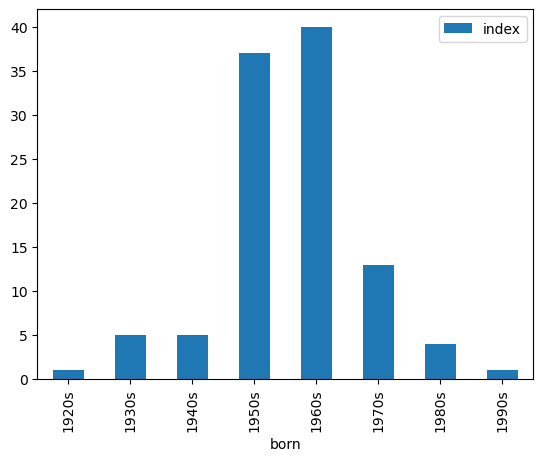

In [115]:
# Plotting results!
bdays = final_df[['born']].dropna()

bdays_processed = bdays.applymap(lambda bday: str(int(bday.year / 10) * 10) + 's')

bdays_processed.reset_index().groupby('born').count().plot(kind='bar')

In [116]:
today = datetime.today()
ages = []
for bday in bdays.values:
    time = datetime.strptime(str(bday[0]).split(" ")[0], '%Y-%m-%d')
    interval = today - time
    ages.append(interval.days/365)

In [117]:
ages

[55.276712328767125,
 59.32876712328767,
 69.65205479452055,
 54.583561643835615,
 50.6958904109589,
 54.69315068493151,
 52.87397260273973,
 71.36438356164383,
 61.895890410958906,
 72.28493150684932,
 56.11506849315069,
 62.961643835616435,
 65.74520547945205,
 92.09041095890412,
 63.12328767123287,
 64.92328767123287,
 75.61917808219178,
 58.62739726027397,
 65.43835616438356,
 67.03287671232877,
 68.7013698630137,
 49.00821917808219,
 72.02465753424657,
 57.706849315068496,
 63.24383561643835,
 60.156164383561645,
 53.28219178082192,
 57.58082191780822,
 65.30410958904109,
 52.413698630136984,
 52.413698630136984,
 42.37808219178082,
 42.37808219178082,
 48.47397260273973,
 59.50684931506849,
 38.347945205479455,
 78.13150684931507,
 60.76438356164383,
 71.94246575342466,
 51.038356164383565,
 53.57808219178082,
 60.75068493150685,
 62.62465753424657,
 62.62465753424657,
 50.28219178082192,
 82.81095890410958,
 85.52602739726028,
 94.57260273972602,
 56.62191780821918,
 87.79726027

In [118]:
np.mean(ages)

61.99444300852934

In [119]:
np.median(ages)

61.54794520547945

## Conclusion

It appears most CEO's are a bit older than just "middle-aged"! Perhaps the age distribution of CEO's is different from those of founders, who are sterotypically younger and more energetic. These results (mean & median CEO age ~= 62) are somewhat in line with this Fortune article: https://bit.ly/3RMwZpM, which state the average CEO of a Fortune 500 company is about 57 years old! Of course Wikipedia data is far from perfect, but it was still cool to see these results!